# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропущенными-значениями" data-toc-modified-id="Работа-с-пропущенными-значениями-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропущенными значениями</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-количество-комнат,-высота-потолков." data-toc-modified-id="Изучение-параметров:-площадь,-цена,-количество-комнат,-высота-потолков.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, количество комнат, высота потолков.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Удаление-редких-и-выбивающихся-значений" data-toc-modified-id="Удаление-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление редких и выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-факторов,--влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,--влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов,  влияющих на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-десяти-населенных-пунктов-с-наибольшим-числом-обьявлений" data-toc-modified-id="Анализ-десяти-населенных-пунктов-с-наибольшим-числом-обьявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ десяти населенных пунктов с наибольшим числом обьявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-изменения-цены-по-степени-удаленности-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удаленности-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ изменения цены по степени удаленности от центра</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу" data-toc-modified-id="Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Сравнение выводов по квартирам в центре и общих выводов по всему городу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

import warnings # Отключаю предупреждения, они меня нервируют)
warnings.filterwarnings('ignore')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод
Названия столбцов в порядке. Пропущенные значения по 13 столбцам из 22. Некоторые выглядят вполне логично, например, в столбце по балконам и водоемам поблизости ноль вполне понятен. С некоторыми придется разбираться.

## Предобработка данных

### Работа с пропущенными значениями

In [2]:
#Заменяю пропуски в столбце is_apartment на False.
print('Пропуски апартаменты до:', data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Пропуски апартаменты после:', data['is_apartment'].isna().sum())

#Заменяю пропуски в столбце balcony на 0.
print('Пропуски балконы до:', data['balcony'].isna().sum())
data['balcony'] = data['balcony'].fillna(0)
print('Пропуски балконы после:', data['balcony'].isna().sum())

#Заменяю пропуски в столбце ceiling_height, медианным значением, поскольку разброс тут явно не большой 
# в соответсвии со строительными стандартами.
print('Пропуски высота потолков до:', data['ceiling_height'].isna().sum())
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
print('Пропуски высота потолков после:', data['ceiling_height'].isna().sum())

# Пропуски в столбцах площадей заполняю медианой с группировкой по числу комнат методом loc().
print('Пропуски жилая площадь до:', data['living_area'].isna().sum())
for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = median
print('Пропуски жилая площадь после:', data['living_area'].isna().sum())

print('Пропуски площадь кухни до:', data['kitchen_area'].isna().sum())
for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area'] = median
print('Пропуски площадь кухни после:', data['kitchen_area'].isna().sum())
#У студий нет площади кухни, поэтому оставшиеся пропуски заменяю на 0.
data['kitchen_area'] = data['kitchen_area'].fillna(0)
print('Пропуски площадь кухни после_2:', data['kitchen_area'].isna().sum())

# Пропуски в столбце locality_name удаляю, поскольку их значение незначительно.
print('Пропуски населенный пункт до:', data['locality_name'].isna().sum())
data.dropna(subset = ['locality_name'], inplace = True)
print('Пропуски населенный пункт после:',data['locality_name'].isna().sum())

# Пропуски в картографических данных заменяю медианой по населенному пункту.
print('Пропуски ближайший аэропорт до:', data['airports_nearest'].isna().sum())
print('Пропуски расстояние до центра до:', data['cityCenters_nearest'].isna().sum())
print('Пропуски парки в радиусе 3 км до:', data['parks_around3000'].isna().sum())
print('Пропуски расстояние до парка до:', data['parks_nearest'].isna().sum())
print('Пропуски водоемы в радиусе 3 км до:', data['ponds_around3000'].isna().sum())
print('Пропуски расстояние до водоема до:', data['ponds_nearest'].isna().sum())

nearest = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest']

for column in nearest:
    for locality in data['locality_name'].unique():
        median = data.loc[data['locality_name'] == locality, column].median()
        data.loc[(data[column].isna()) & (data['locality_name'] == locality), column] = median

print('Пропуски ближайший аэропорт после:', data['airports_nearest'].isna().sum())
print('Пропуски расстояние до центра после:', data['cityCenters_nearest'].isna().sum())
print('Пропуски парки в радиусе 3 км после:', data['parks_around3000'].isna().sum())
print('Пропуски расстояние до парка после:', data['parks_nearest'].isna().sum())
print('Пропуски водоемы в радиусе 3 км после:', data['ponds_around3000'].isna().sum())
print('Пропуски расстояние до водоема после:', data['ponds_nearest'].isna().sum())

# Помогло мало, поэтому оставшиеся пропуски заменяю медианой по всему столбцу.
for column in nearest:
    data.loc[data[column].isna(), column] = data[column].median()
  
print('Пропуски ближайший аэропорт после2:', data['airports_nearest'].isna().sum())
print('Пропуски расстояние до центра после2:', data['cityCenters_nearest'].isna().sum())
print('Пропуски парки в радиусе 3 км после2:', data['parks_around3000'].isna().sum())
print('Пропуски расстояние до парка после2:', data['parks_nearest'].isna().sum())
print('Пропуски водоемы в радиусе 3 км после2:', data['ponds_around3000'].isna().sum())
print('Пропуски расстояние до водоема после2:', data['ponds_nearest'].isna().sum())

Пропуски апартаменты до: 20924
Пропуски апартаменты после: 0
Пропуски балконы до: 11519
Пропуски балконы после: 0
Пропуски высота потолков до: 9195
Пропуски высота потолков после: 0
Пропуски жилая площадь до: 1903
Пропуски жилая площадь после: 0
Пропуски площадь кухни до: 2278
Пропуски площадь кухни после: 197
Пропуски площадь кухни после_2: 0
Пропуски населенный пункт до: 49
Пропуски населенный пункт после: 0
Пропуски ближайший аэропорт до: 5534
Пропуски расстояние до центра до: 5511
Пропуски парки в радиусе 3 км до: 5510
Пропуски расстояние до парка до: 15586
Пропуски водоемы в радиусе 3 км до: 5510
Пропуски расстояние до водоема до: 14565
Пропуски ближайший аэропорт после: 5386
Пропуски расстояние до центра после: 5386
Пропуски парки в радиусе 3 км после: 5386
Пропуски расстояние до парка после: 5998
Пропуски водоемы в радиусе 3 км после: 5386
Пропуски расстояние до водоема после: 5494
Пропуски ближайший аэропорт после2: 0
Пропуски расстояние до центра после2: 0
Пропуски парки в рад

### Изменение типов данных

In [3]:
data.dtypes # Смотрим типы данных. Явно в столбце first_day_exposition должен быть тип данных datetime, а не object, 
# иначе работать с датами будет невозможно.
# В столбцах floors_total, balcony, days_exposition логично будет поменять тип с вещественного на целочисленные значения.
#!!!! Объяснение про days_exposition
# Меняю только балконы, потому что именно эти данные понадобятся для расчетов, и в этом столбце обработаны пропуски.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['balcony'] = data['balcony'].astype('int')
print(data['first_day_exposition'].dtypes)
print(data['balcony'].dtypes)

print ('Дубликатов в таблице', data.duplicated().sum()) # Проверяю на наличие явных дубликатов


datetime64[ns]
int64
Дубликатов в таблице 0


### Вывод
В таблице заменены пропуски почти по всем значениям, исключениями стали столбцы, которые не понадобятся для дальнейших расчетов.
Пропуски в столбце is_apartment заменены на False, поскольку владельцы квартир не указывали ничего в этой графе.
Пропуски в столбце balcony заменены на 0, поскольку владельцы не указывали ничего в этой графе, если балкона нет.
Пропуски в столбце locality_name удалены, их было очень мало и взять значения неоткуда. Возможно, данные потерялись при выгрузке.
Остальные пропуски заменены на медианные значения, по возможности с группировкой по данным в других столбцах.
Типы данных изменены в подходящие для работы методами to_datetime() и astype().

## Расчёты и добавление результатов в таблицу

In [4]:
# Добавляю в таблицу цену квадратного метра.
data['price_m2'] = data['last_price'] / data['total_area']

# Добавляю в таблицу новые столбцы с номером дня недели, месяцем и годом публицации объявления.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Добавляю в таблицу столбец с этажом квартиры.
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row ['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

# Добавляю в таблицу столбцы с данными по соотношению жилой и общей площади, отношение площади кухни к общей.
data['ratio_living_area'] = (data['living_area'] / data['total_area']).map('{:,.2%}'.format)
data['ratio_kitchen_area'] = (data['kitchen_area'] / data['total_area']).map('{:,.2%}'.format)

display(data.head(3))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_category,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.22%,23.15%
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,584.5,81.0,82920.792079,1,12,2018,первый,46.04%,27.23%
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.25%,14.82%


### Вывод

Добавлены необходимые для последующего анализа новые столбцы. Выполнены расчеты, столбцы заполнены значениями.

## Исследовательский анализ данных

###  Изучение параметров: площадь, цена, количество комнат, высота потолков.

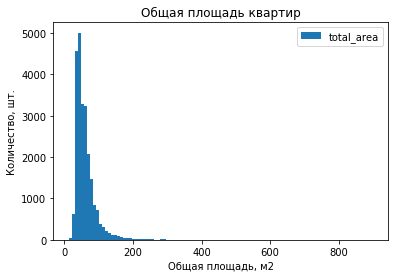

Границы интервала наиболее вероятных значений площади: -4.550000000000004 114.25


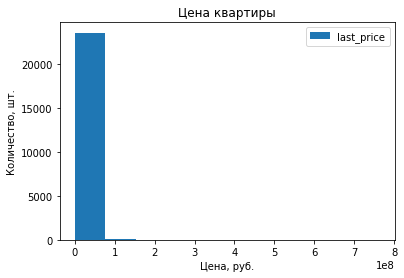

Минимальное значение: 12190.0
Максимальное значение: 763000000.0
Медианное значение: 4650000.0
Среднее значение: 6541126.897928119
Границы интервала наиболее вероятных значений цены: -1698500.0 11897500.0


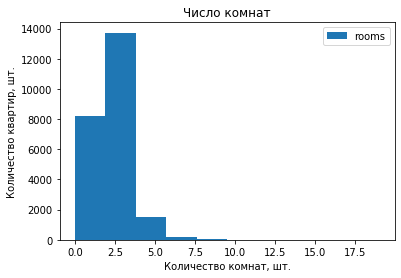

Границы интервала наиболее вероятных значений комнат: -2.0 6.0


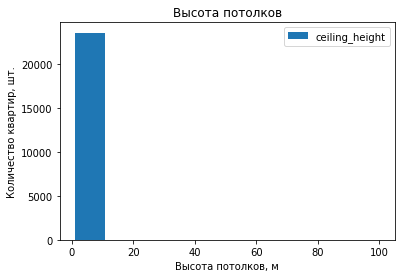

Границы интервала наиболее вероятных значений высоты потолков: 2.45 2.8500000000000005


In [5]:
import matplotlib.pyplot as plt # Строим гистограммы по параметрам: площадь, цена, количество комнат, высота потолков.

data.plot(kind='hist', bins=100, y='total_area', title='Общая площадь квартир', legend=True)# Строим гистограмму по площади.
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество, шт.')
plt.show()
data['total_area'].describe() # Судя по гистограмме пик значений количества квартир приходится на площадь около 50 м2.
# Площади более 150 м2 являются редкими значениями.
# C помощью метода describe() можно посмотреть минимальное значение - 19м2, максимальное значение - 900 м2, среднее - 60 м2.
#Рассчитаем границы выбросов с помощью IQR:
q1 = data['total_area'].quantile(0.25)
q3 = data['total_area'].quantile(0.75)
iqr = q3 - q1
print('Границы интервала наиболее вероятных значений площади:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)
rare_values_area_border = 115 # Создаю переменную со значением границы выбросов

data.plot(kind='hist', bins=10, y='last_price', title='Цена квартиры', legend=True) # Строим гистограмму по ценам.
plt.xlabel('Цена, руб.')
plt.ylabel('Количество, шт.')
plt.show()
data['last_price'].describe()
print('Минимальное значение:', data['last_price'].min())
print('Максимальное значение:', data['last_price'].max())
print('Медианное значение:', data['last_price'].median())
print('Среднее значение:', data['last_price'].mean())
# Очень большой разброс по ценам, минимальное значение 12 190, максимальное 763 млн. Медиана 4,6 млн.
# Судя по графику сделки дороже 7 млн. уже редки.
#Рассчитаем границы выбросов с помощью IQR:
q1 = data['last_price'].quantile(0.25)
q3 = data['last_price'].quantile(0.75)
iqr = q3 - q1
print('Границы интервала наиболее вероятных значений цены:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)
rare_values_price_border = 12000000 # Создаю переменную со значением границы выбросов

#data['rooms'].hist(bins = 10) #Гистограмма по количеству комнат.
data.plot(kind='hist', bins=10, y='rooms', title='Число комнат', legend=True) # Строим гистограмму по количеству комнат.
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()
data['rooms'].describe()
# Сразу бросается в глаза странное минимальное значение 0 комнат, вероятно студии. Судя по графику больше всего на рынке 2-3 комнатных квартир.
# Медиана равна 2. Максимальное значение 19. Квартиры больше 5 комнат довольно редки, но сильно вляют на среднее и явлются выбросами.
# Рассчитаем границы выбросов с помощью IQR:
q1 = data['rooms'].quantile(0.25)
q3 = data['rooms'].quantile(0.75)
iqr = q3 - q1
print('Границы интервала наиболее вероятных значений комнат:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)
rare_values_rooms_border = 6 # Создаю переменную со значением границы выбросов

data.plot(kind='hist', bins=10, y='ceiling_height', title='Высота потолков', legend=True) # Строим гистограмму по высоте потолков.
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир, шт.')
plt.show()
data['ceiling_height'].describe()
# Минимальные и максимальные значения (1 и 100 метров) явно не соответствуют реальности. В данных присутствуют ошибки.
# А медиана в 2,65 м похожа на правду. Минимальная высота потолков в жилых помещениях регламентирована и не может быть меньше 2,5 м.
# Максимальные значения могут быть где-то в районе 5-7 метров в частных домах или старинных особняках.
q1 = data['ceiling_height'].quantile(0.25)
q3 = data['ceiling_height'].quantile(0.75)
iqr = q3 - q1
print('Границы интервала наиболее вероятных значений высоты потолков:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)

#### Вывод
Изучив гистограммы по параметрам площадь, цена, количество комнат и высота потолков можно сказать следующее:
Больше всего кварир с площадью 50-60 м2, минимальные значения около 20 м2, а квартиры больше 150 м2 уже редкость.
В данных огромный разброс по ценам, но средняя цена квартиры 4,6 млн.руб., а сделки дороже 7 млн. встречаются не часто.
Больше всего на рынке 2-х комнатных квартир. В целом, высота потолков соответствует строительным стандартам 2.45-2.85 м.

### Изучение времени продажи квартиры

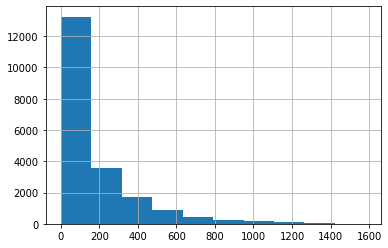

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


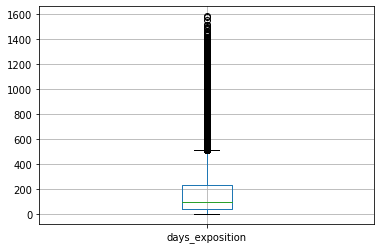

Границы интервала наиболее вероятных значений: -234.0 510.0


In [6]:
data['days_exposition'].hist(bins = 10) # Гистограмма по параметру время продажи.
plt.show()
print(data['days_exposition'].describe())
# Среднее время продажи 180 дней, а медиана 95 дней. Среднее в два раза больше медианы, большие выбросы в сторону макс. значений

data.boxplot('days_exposition') # Построим диаграмму размаха
plt.show()
# Судя по диаграмме выбросы начинаются примерно со значения 550
# Рассчитаем границы выбросов с помощью IQR:
q1 = data['days_exposition'].quantile(0.25)
q3 = data['days_exposition'].quantile(0.75)
iqr = q3 - q1
print('Границы интервала наиболее вероятных значений:', q1 - 1.5 * iqr, q3 + 1.5 * iqr)
# Получается, что нижняя граница сливается с нулем а верхняя 510 дней. 
# Eсли квартира продается дольше 510 дней - это необычно долго. 
# А если меньше 45 дней (значение первого квартиля), то продажу можно считать очень быстрой.
rare_values_days_exposition_border = 510


#### Вывод
Среднее время продажи квартиры 95 дней. Eсли квартира продается дольше 510 дней - это необычно долго. 
А если меньше 45 дней, то продажу можно считать очень быстрой.

### Удаление редких и выбивающихся значений

In [7]:
# Для того, чтобы убрать искажения в данных создадим новый фрейм без редких и выбивающихся значений
# Используем метод query() и отрежем выбросы, найденные в предыдуших двух пунктах
df_filtered = data.query('total_area <= @rare_values_area_border')
df_filtered = df_filtered.query('last_price <= @rare_values_price_border')
df_filtered = df_filtered.query('0 < rooms <= @rare_values_rooms_border')
df_filtered = df_filtered.query('2.45 <= ceiling_height <= 2.85')
df_filtered = df_filtered.query('days_exposition <= @rare_values_days_exposition_border')
df_filtered.head(10)
print(100-len(df_filtered)/len(data)*100) # В фильтрованном фрейме осталось 15917 строк, в исходном было 23699. 
# Таким образом, я отбросила 32.7 % данных. Многовато, конечно.
print(len(df_filtered))

32.69767441860465
15917


#### Вывод
При удалении редких и выбивающихся значений (выбросов) было потеряно 32,7 % данных. Разброс цен на недвижимость очень большой.

### Исследование факторов,  влияющих на стоимость квартиры

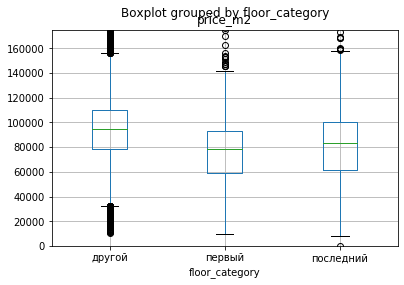

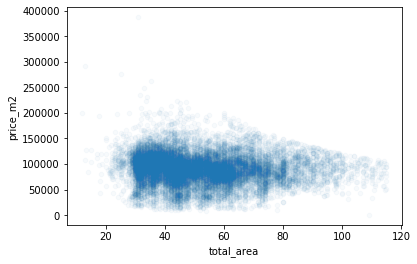

-0.08831693539389816


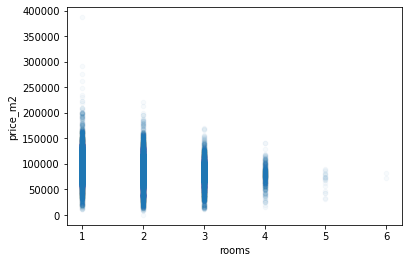

-0.24307285613861013


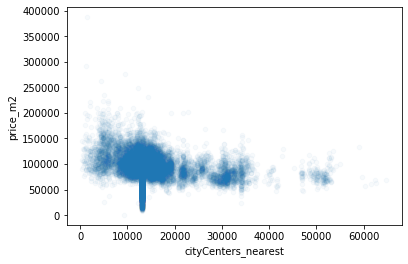

-0.18947854880927084


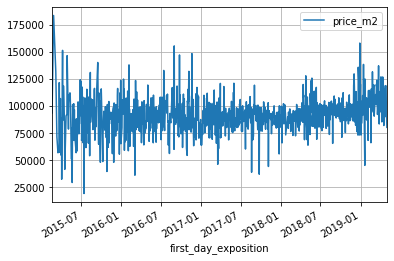

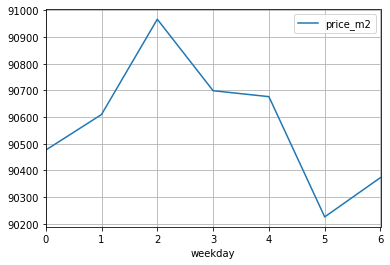

In [8]:
#Изучим как влияют на цену м2 параметры: этаж, общая площадь, количество комнат, удаленность от центра и дата размещения обьявления

df_filtered.boxplot(column = 'price_m2', by ='floor_category')# Строим диаграмму размаха для категории этажей
plt.ylim(0, 175000)
plt.show()
# Судя по графику цена м2 в квартирах на первом  и последнем этажах существенно ниже чем на других.
# Медиана цены в квартирах на первом этаже около 78 тыс., на последнем этаже 83 тыс., на других этажах 94 тыс.
# Межквартильный размах у квартир на последних этажах шире, значит вероятность продать дороже выше, чем на первом.

df_filtered.plot(x='total_area', y='price_m2', kind='scatter', alpha=0.03)# Строю диаграмму рассеяния для общей площади
plt.show()
print(df_filtered['price_m2'].corr(df_filtered['total_area'])) # Чтобы выявить взаимосвязь считаю коэффициент корреляции Пирсона
# График выглядит равномерным, коэффициент корреляции близок к нулю, то есть при изменении одной величины, другая остаётся прежней. 


df_filtered.plot(x='rooms', y='price_m2', kind='scatter', alpha=0.03)# Строю диаграмму рассеяния для комнат и цены м2
plt.show()
print(df_filtered['price_m2'].corr(df_filtered['rooms'])) 
# Судя по графику чем меньше комнат в квартире, тем выше цена за м2
# Коэффициент корреляции также указывает на то, что рост цены связан с уменьшением количества комнат

df_filtered.plot(x='cityCenters_nearest', y='price_m2', kind='scatter', alpha=0.03)# Строю диаграмму для удаленности от центра
plt.show()
print(df_filtered['price_m2'].corr(df_filtered['cityCenters_nearest']))
# Зависимость есть, чем ближе к центру, тем выше цена за метр. Коэффициент - 0,19 тоже указывает на такую взаимосвязь.
# Также на графике отчетливо виден результат заполнения пустых значений медианой в районе 13 тыс.м от центра

# Построю линейный график по сгруппированным данным дня размещения обьявления и цены за м2
first_day_exposition_stat = df_filtered.pivot_table(index='first_day_exposition', values='price_m2', aggfunc='median')
first_day_exposition_stat.plot(y='price_m2', grid = True)
plt.show()
# На графике видны редкие пики и спады, но в целом цена остается постоянной, около 95 тыс.руб за м2

# Также изучим зависимость от даты размещения по дням недели
weekday_stat = df_filtered.pivot_table(index='weekday', values='price_m2') 
weekday_stat.plot(y='price_m2', grid = True)
plt.show()
# Интересная получается ситуация: в середине недели цена при размещении выше, а в субботу минимальна. 
# Могу предположить, что в середине недели в основном размещают обьявления риелторские компании, юридические лица. А по выходным обычные люди.

#### Вывод
Исследование факторов влияющих на цену показало, что рост цены связан с близостью к центру(коэффициент корреляции -0.19). Также рост цены связан с уменьшением количества комнат (коэффициент корреляции -0.24) и этажностью, квартиры на первом этаже дешевле всего (в среднем 78 тыс.руб.), далее последний этаж (в среднем 83 тыс.руб.) и дороже всего другие этажи (в среднем 94 тыс.руб.). Взаимосвязь цены и общей площади близка к нулю. В целом, цены в наблюдаемом периоде стабильны, около 95 тыс.руб за м2. В середине недели цена при размещении выше, а в субботу минимальна.

### Анализ десяти населенных пунктов с наибольшим числом обьявлений

In [9]:
# Судя по предыдущим пунктам анализа, больше всего на цену влияет местоположение
# Посмотрим на значения столбца locality_name
df_filtered['locality_name'].unique() 
# В списке уникальных значений найдены дубликаты, в некоторых случаях указан посёлок Мурино, а в некоторых поселок Мурино

# С помощью цикла заменяю название населенного пункта на пустое значение и сохраняю в новый столбец
df_filtered['locality_name_new'] = df_filtered['locality_name']
for repl in ['поселок', 'деревня', 'посёлок', 'городской', 'коттеджный']:
    df_filtered['locality_name_new'] = df_filtered['locality_name_new'].str.replace(repl, '')

df_filtered[['locality_name', 'locality_name_new']].drop_duplicates() # Удаляю дубликаты

# Группирую столбцы и вывожу 10 первых значений по убыванию, так получаем 10 населенныхпунктов с самой высокой ценой за м2
print(data.groupby('locality_name').agg({'rooms': 'count', 'price_m2': 'mean'}).sort_values(by = 'rooms', ascending = False).head(10))
# Методом tail() вывожу последнюю строку таблицы и получаем населенный пункт с самой низкой ценой
print(data.groupby('locality_name').agg({'rooms': 'count', 'price_m2': 'mean'}).sort_values(by = 'rooms', ascending = False).tail(1))

                   rooms       price_m2
locality_name                          
Санкт-Петербург    15721  114849.008794
посёлок Мурино       522   85752.189195
посёлок Шушары       440   78677.364217
Всеволожск           398   68654.473986
Пушкин               369  103125.819291
Колпино              338   75424.579098
посёлок Парголово    327   90175.913458
Гатчина              307   68746.146763
деревня Кудрово      299   92473.547576
Выборг               237   58141.909153
               rooms      price_m2
locality_name                     
село Шум           1  33898.305085


#### Вывод
Самая высокая средняя цена за м2 в Санкт-Петербурге - 114 850 руб., самая низкая в селе Шум - 33 898 руб. за м2.

### Анализ изменения цены по степени удаленности от центра

9     15
10    13
15    14
18    10
21     9
Name: spb_centers_nearest, dtype: int64

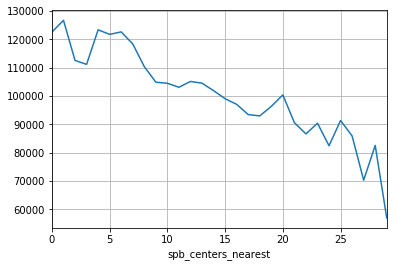

spb_centers_nearest
0    122528.673598
1    126647.014815
2    112502.386293
3    111131.223891
4    123306.051118
5    121700.284312
6    122574.222020
7    118323.310856
Name: price_m2, dtype: float64

In [10]:
# Создаем фрейм с квартирами только в Санкт-Петербурге
locality_spb = df_filtered.query('locality_name_new == "Санкт-Петербург"')
# Создаем столбец с расстоянием в километрах до центра, округляем до целых значений
locality_spb['spb_centers_nearest'] = (locality_spb['cityCenters_nearest']/1000).astype('int')
display(locality_spb['spb_centers_nearest'].head())
# Группируем данные и строим график
locality_spb_grouped = locality_spb.groupby('spb_centers_nearest')['price_m2'].mean()
locality_spb_grouped.plot(x='spb_centers_nearest', y='price_m2', grid=True)
plt.show()
# Судя по графику самые дорогие квартиры расположены в 8 км от центра, далее резкий и неуклонный спад по цене за м2
display(locality_spb_grouped.head(8))

#### Вывод
Самые дорогие квартиры в Санкт-Петербурге находятся в радиусе 8 км. от центра города. Средняя цена 118-122 тыс.руб. за м2.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

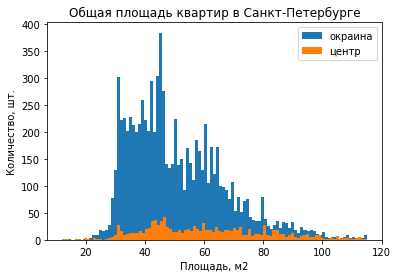

count    1160.000000
mean       60.428207
std        20.289847
min        12.000000
25%        44.075000
50%        58.000000
75%        74.000000
max       115.000000
Name: total_area, dtype: float64
count    8511.000000
mean       50.989354
std        16.446523
min        13.000000
25%        38.500000
50%        46.600000
75%        60.695000
max       115.000000
Name: total_area, dtype: float64


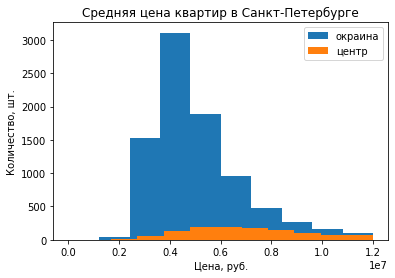

count    1.160000e+03
mean     7.006563e+06
std      2.244086e+06
min      1.686000e+06
25%      5.250000e+06
50%      6.761381e+06
75%      8.600000e+06
max      1.200000e+07
Name: last_price, dtype: float64
count    8.511000e+03
mean     5.088192e+06
std      1.768929e+06
min      1.219000e+04
25%      3.831500e+06
50%      4.650000e+06
75%      5.900000e+06
max      1.200000e+07
Name: last_price, dtype: float64


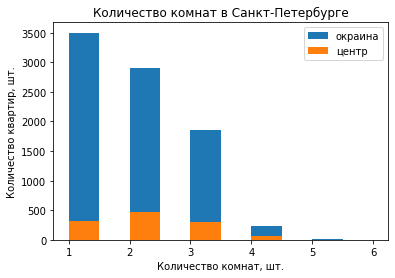

count    1160.000000
mean        2.105172
std         0.893447
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64
count    8511.000000
mean        1.866173
std         0.856891
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: rooms, dtype: float64


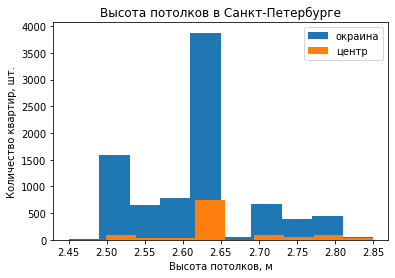

count    1160.000000
mean        2.657810
std         0.072948
min         2.460000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64
count    8511.000000
mean        2.627593
std         0.081619
min         2.450000
25%         2.560000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64


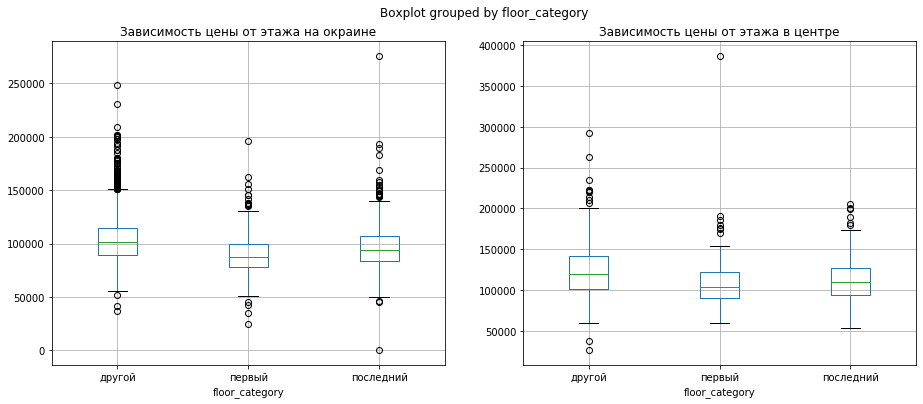

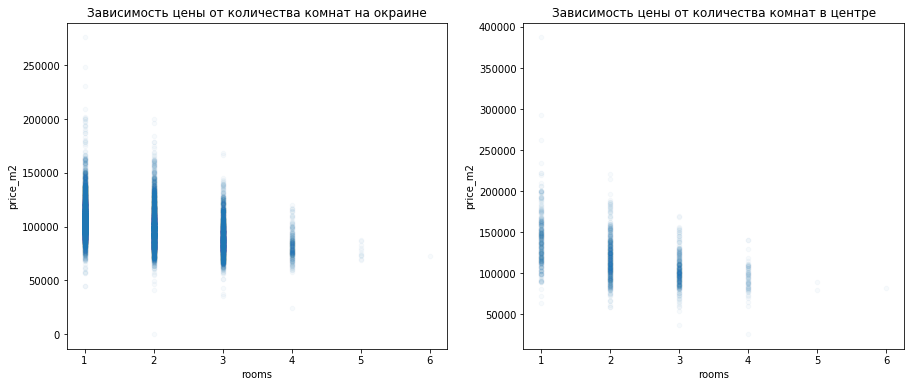

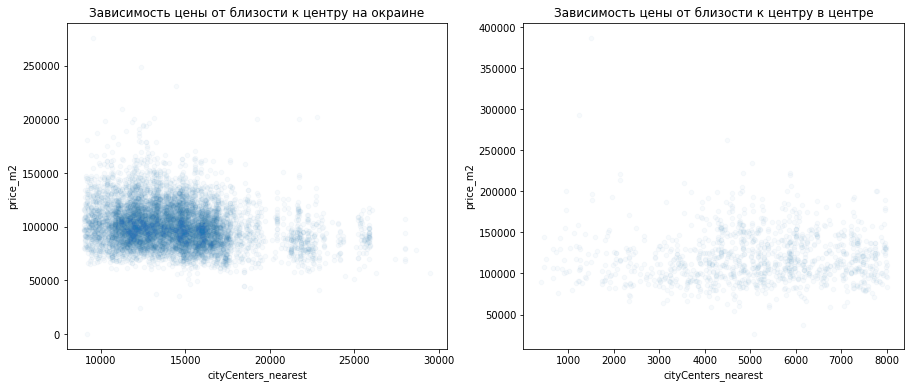

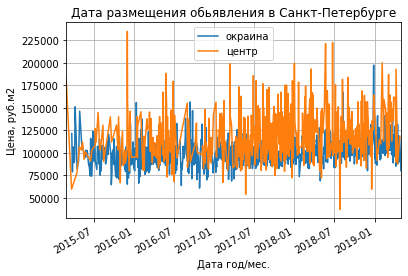

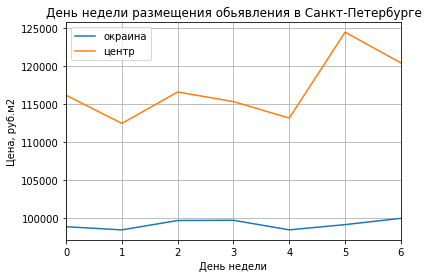

In [11]:
# Создаю таблицу по квартирам в самом центре
locality_spb_centr = locality_spb.query('spb_centers_nearest < 8')
# Создаю таблицу по квартирам не в центре
locality_spb_not_the_city_centr = locality_spb.query('spb_centers_nearest > 8')
#display(locality_spb_centrs['spb_centers_nearest'])

# Повторяю анализ по параметрам и факторам из п.4.1 и п.4.4
# Строю сравнительную гистограмму площади квартир.
ax = locality_spb_not_the_city_centr.plot(kind='hist', bins=100, y='total_area', legend=True, label='окраина')
locality_spb_centr.plot(kind='hist', bins=100, y='total_area', legend=True, label='центр', ax=ax)

plt.title('Общая площадь квартир в Санкт-Петербурге')
plt.xlabel('Площадь, м2')
plt.ylabel('Количество, шт.')
plt.show()

print(locality_spb_centr['total_area'].describe()) 
print(locality_spb_not_the_city_centr['total_area'].describe()) 
# Средняя площадь квартир в центре примерно на 10 м2 больше чем на окраине. Среднее значение 60 м2 в центре и 51 м2 на окраине.
# Медиана по центру 58м2, а по окраине 47м2. Разброс одинаковый от 12 до 115 м2.
# На графике более равномерное распределение по площади в центре, а на окраине гораздо больше малогабаритных вариантов.



#Строим гистограмму по ценам в центре и на окраине.
ax = locality_spb_not_the_city_centr.plot(kind='hist', bins=10, y='last_price', legend=True, label='окраина')
locality_spb_centr.plot(kind='hist', bins=10, y='last_price', legend=True, label='центр', ax=ax)
plt.title('Средняя цена квартир в Санкт-Петербурге')
plt.xlabel('Цена, руб.')
plt.ylabel('Количество, шт.')
plt.show()
print(locality_spb_centr['last_price'].describe())
print(locality_spb_not_the_city_centr['last_price'].describe())
# Средняя цена квартиры в центре 7 млн.руб, а на окраине 5 млн. Причем бюджетных вариантов на окраине гораздо больше.

#Гистограмма по количеству комнат.
ax = locality_spb_not_the_city_centr.plot(kind='hist', bins=10, y='rooms', legend=True, label='окраина')
locality_spb_centr.plot(kind='hist', bins=10, y='rooms', legend=True, label='центр', ax=ax)
plt.title('Количество комнат в Санкт-Петербурге')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()
print(locality_spb_centr['rooms'].describe())
print(locality_spb_not_the_city_centr['rooms'].describe())
# Больше всего двухкомнатных квартир как в центре, так и на окраине.

# Гистограмма по высоте потолков.
ax = locality_spb_not_the_city_centr.plot(kind='hist', bins=10, y='ceiling_height', legend=True, label='окраина')
locality_spb_centr.plot(kind='hist', bins=10, y='ceiling_height', legend=True, label='центр', ax=ax)
plt.title('Высота потолков в Санкт-Петербурге')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир, шт.')
plt.show()
print(locality_spb_centr['ceiling_height'].describe())
print(locality_spb_not_the_city_centr['ceiling_height'].describe())
# Средняя высота потолков в центре и на окраине такая же 2,65 м.


# Строим диаграмму размаха для категории этажей
fig, axes = plt.subplots(1,2, figsize=(15,6))
locality_spb_not_the_city_centr.boxplot(column = 'price_m2', by ='floor_category', ax=axes[0])
axes[0].set_title('Зависимость цены от этажа на окраине')
locality_spb_centr.boxplot(column = 'price_m2', by ='floor_category', ax=axes[1])
axes[1].set_title('Зависимость цены от этажа в центре')
plt.show()
# Так же цена м2 в центре и на окраине на первом  и последнем этажах существенно ниже чем на других.


# Строю диаграмму рассеяния для комнат и цены м2
fig, axes = plt.subplots(1,2, figsize=(15,6))
locality_spb_not_the_city_centr.plot(x='rooms', y='price_m2', kind='scatter', alpha=0.03, ax=axes[0])
axes[0].set_title('Зависимость цены от количества комнат на окраине')
locality_spb_centr.plot(x='rooms', y='price_m2', kind='scatter', alpha=0.03, ax=axes[1])
axes[1].set_title('Зависимость цены от количества комнат в центре')
plt.show()
#Зависимость сохраняется, чем меньше комнат в квартире, тем выше цена за м2

#Строю диаграмму для удаленности от центра
fig, axes = plt.subplots(1,2, figsize=(15,6))
locality_spb_not_the_city_centr.plot(x='cityCenters_nearest', y='price_m2', kind='scatter', alpha=0.03, ax=axes[0])
axes[0].set_title('Зависимость цены от близости к центру на окраине')
locality_spb_centr.plot(x='cityCenters_nearest', y='price_m2', kind='scatter', alpha=0.03, ax=axes[1])
axes[1].set_title('Зависимость цены от близости к центру в центре')
plt.show()
# Зависимость не видна, по всему центру и по окраине цена за м2 распределена равномерно.


# Построю линейный график по сгруппированным данным дня размещения обьявления и цены за м2
ax = (locality_spb_not_the_city_centr
 .pivot_table(index='first_day_exposition', values='price_m2', aggfunc='median')
 .plot(y='price_m2', legend=True, label='окраина', grid = True)
)
(locality_spb_centr
 .pivot_table(index='first_day_exposition', values='price_m2', aggfunc='median')
 .plot(y='price_m2', grid = True, legend=True, label='центр', ax=ax)
)
plt.title('Дата размещения обьявления в Санкт-Петербурге')
plt.xlabel('Дата год/мес.')
plt.ylabel('Цена, руб.м2')
plt.show()
# Цена остается на протяжении времени в диапазоне 100-150 тыс.руб за м2 в центре и 80-125 тыс.руб. за м2 на окраине.


# Также изучим зависимость от даты размещения по дням недели
ax = (locality_spb_not_the_city_centr
 .pivot_table(index='weekday', values='price_m2', aggfunc='median')
 .plot(y='price_m2', legend=True, label='окраина', grid = True)
)
(locality_spb_centr
 .pivot_table(index='weekday', values='price_m2', aggfunc='median')
 .plot(y='price_m2', grid = True, legend=True, label='центр', ax=ax)
)
plt.title('День недели размещения обьявления в Санкт-Петербурге')
plt.xlabel('День недели')
plt.ylabel('Цена, руб.м2')
plt.show()




#### Вывод
Проанализировав параметры и факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга, можно сказать, что они отличаются от всех объектов города по цене и по площади. Средняя площадь квартир в центре примерно на 10 м2 больше чем на окраине. Среднее значение 60 м2 в центре и 51 м2 на окраине. Разброс от 12 до 115 м2. Более равномерное распределение по площади в центре, а на окраине гораздо больше малогабаритных вариантов. Средняя цена квартиры в центре 7 млн.руб, а на окраине 5 млн. Причем бюджетных вариантов на окраине гораздо больше. 
Больше всего двухкомнатных квартир. Средняя высота потолков в центре такая же как и на окраине 2,65 м. Так же цена м2 в квартирах на первом  и последнем этажах существенно ниже чем на других. Зависимость сохраняется, чем меньше комнат в квартире, тем выше цена за м2. 
Цена остается на протяжении времени в диапазоне 100-150 тыс.руб за м2 в центре и 80-125 тыс.руб. за м2 на окраине.

## Общий вывод

Задача исследования - установить параметры, влияющие на цену квартир в Санкт-Петербурге и области. Главным параметром оказалось удаленность от центра, чем ближе к центру тем дороже. Причем средняя цена обьекта в центре на 50 % выше средней цены квартиры не в центре (7 и 4,6 млн.руб.соответственно). Чем меньше комнат в квартире, тем дороже м2. Квартиры на первом этаже дешевле всего (в среднем 78 тыс.руб.), далее последний этаж (в среднем 83 тыс.руб.) и дороже всего другие этажи (в среднем 94 тыс.руб.).
Выбор на рынке большой и по цене и по площади, однако средний обьект это двухкомнатная квартира, площадью 60 м2, с высотой потолков, соответствующей строительным стандартам (2.45-2.85 м).
Цены в наблюдаемом периоде стабильны, около 95 тыс.руб за м2. Средний срок продажи квартиры 95 дней.